In [22]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
td_train = pd.read_csv('train.csv')
test = pd.read_csv('train.csv')
full_data = ['td_train', 'test']

# Embarked
# only in titanic_df, fill the two missing values with the most occurred value, which is "S".
td_train["Embarked"] = td_train["Embarked"].fillna("S")
td_train['Age'] = td_train['Age'].fillna(td_train['Age'].mean()) # Impute missing age values with mean age

#test data
test["Embarked"] = test["Embarked"].fillna("S")
test['Age'] = test['Age'].fillna(td_train['Age'].mean())

# drop the unused variables
X = td_train.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1).values
y = td_train.iloc[:, 1].values

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])
X[:, 6] = labelencoder_X.fit_transform(X[:, 6])
onehotencoder = OneHotEncoder(categorical_features = [1]) # create dummy variables
X = onehotencoder.fit_transform(X).toarray()

# Splitting the dataset into the Training set and Test set
X_train = X
y_train = y
#test
X_test = test.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1).values

labelencoder_X_test = LabelEncoder()
X_test[:, 1] = labelencoder_X_test.fit_transform(X_test[:, 1])
X_test[:, 6] = labelencoder_X_test.fit_transform(X_test[:, 6])
onehotencoder = OneHotEncoder(categorical_features = [1]) # create dummy variables
X_test = onehotencoder.fit_transform(X_test).toarray()


In [25]:
td_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [9]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
svc = SVC(kernel='precomputed')
kernel_train = np.dot(X_train, X_train.T)  # linear kernel
svc.fit(kernel_train, y_train)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [10]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
classifier.score(X_train, y_train)

0.98204264870931535

In [11]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 2].min() - 1, stop = X_set[:, 2].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 3].min() - 1, stop = X_set[:, 3].max() + 1, step = 0.01))
#XX1 = X_set[:, 2]
#XX2 = X_set[:, 3]
#X1, X2 = np.meshgrid(XX1, XX2)
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

'''Z_train = np.array([X1.ravel(), X2.ravel()]).T
plt.contourf(X1, X2, classifier.predict(sc.transform(Z_train)).reshape(X1.shape),  # TRANFORM Z
                                    alpha=0.75,
                                    cmap=ListedColormap(
                                    ('red', 'green')))'''
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logestic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.legend()
plt.show()

ValueError: Number of features of the model must match the input. Model n_features is 8 and input n_features is 2 

In [12]:
#kernel_test = np.dot(X_test, X_train[svc.support_, :].T)
from sklearn.metrics import accuracy_score
kernel_test = np.dot(X_test, X_train.T)
y_pred = svc.predict(kernel_test)
#print("accuracy score: %0.3f" % accuracy_score(y_test, y_pred))
print(accuracy_score(y_train, y_pred))

0.786756453423


In [13]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

0.98204264870931535

In [27]:
X1 = X[:, 0] #X-Axis - pClass
X2 = X[:, 1] #y-Axis - Gender
survived = y #species

X1_min, X1_max = X1.min() - .5,X1.max() + .5
X2_min, X2_max = X2.min() - .5,X2.max() + .5

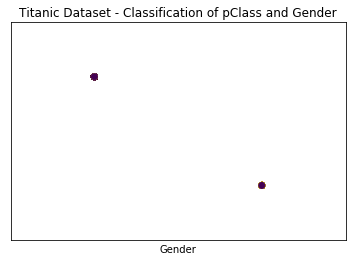

In [28]:
#SCATTERPLOT
plt.figure()
plt.title('Titanic Dataset - Classification of pClass and Gender')
plt.scatter(X1,X2, c=survived)
plt.xlabel('pClass')
plt.xlabel('Gender')
plt.xlim(X1_min, X1_max)
plt.ylim(X2_min, X2_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [30]:
X3 = X[:, 2] #X-Axis - Age
X4 = X[:, 6] #y-Axis - Embarked
survived = y #species

X3_min, X3_max = X3.min() - .5,X3.max() + .5
X4_min, X4_max = X4.min() - .5,X4.max() + .5

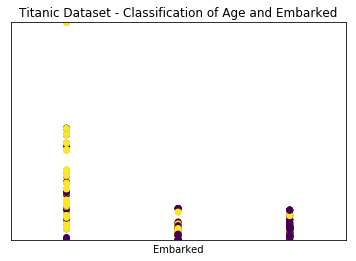

In [31]:
#SCATTERPLOT
plt.figure()
plt.title('Titanic Dataset - Classification of Age and Embarked')
plt.scatter(X3,X4, c=survived)
plt.xlabel('Age')
plt.xlabel('Embarked')
plt.xlim(X3_min, X3_max)
plt.ylim(X4_min, X4_max)
plt.xticks(())
plt.yticks(())
plt.show()